In [10]:
from censaurus.tiger import AreaCollection
import matplotlib.pyplot as plt
from random import randint, uniform
from math import floor

In [11]:
def hsv_to_rgb(h, s, v):
    """*** TAKEN FROM https://stackoverflow.com/questions/1586147/how-to-generate-random-greenish-colors ***"""
    h, s, v = [float(x) for x in (h, s, v)]

    hi = (h / 60) % 6
    hi = int(round(hi))

    f = (h / 60) - (h / 60)
    p = v * (1 - s)
    q = v * (1 - f * s)
    t = v * (1 - (1 - f) * s)

    if hi == 0:
        return v, t, p
    elif hi == 1:
        return q, v, p
    elif hi == 2:
        return p, v, t
    elif hi == 3:
        return p, q, v
    elif hi == 4:
        return t, p, v
    elif hi == 5:
        return v, p, q

def random_color(ranges):
    """*** ADAPTED FROM https://stackoverflow.com/questions/1586147/how-to-generate-random-greenish-colors ***"""
    h_range, s_range, v_range = ranges[0], ranges[1], ranges[2]
    h = randint(h_range[0], h_range[1])
    s = uniform(s_range[0], s_range[1])
    v = uniform(v_range[0], v_range[1])

    r, g, b = hsv_to_rgb(h, s, v)
    r, g, b = [floor(x*255) for x in (r, g, b)]
    return '#%02x%02x%02x' % (r, g, b)

In [5]:
areas = AreaCollection()

In [6]:
county_layer = areas.get_layer(layer_name='Counties')

In [7]:
counties = county_layer.get_features(
    bbox=[-110, 25, -90, 50],
    out_fields='GEOID', 
    return_geometry=True
)

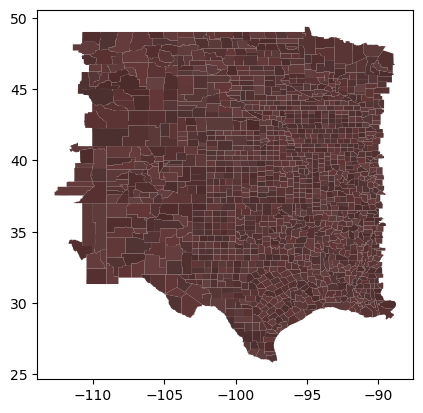

In [16]:
GREEN = [[115, 125], [0.45, 0.55], [0.65, 0.75]]
BROWN = [[23, 26], [0.35, 0.45], [0.3, 0.4]]

counties.plot(color=[random_color(BROWN) for i in range(len(counties))])
plt.show()